In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
train = '../Datasets/garbage classification/Garbage classification/train'
test = '../Datasets/garbage classification/Garbage classification/train'

In [9]:
!pwd

/home/amuzak/Notebooks


In [10]:
train_generator = ImageDataGenerator(validation_split=0.2,rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      shuffle=True,
                                                      class_mode = 'categorical',
                                                      subset='training')

Found 1831 images belonging to 6 classes.


In [11]:
val_generator = ImageDataGenerator(validation_split=0.2,rescale = 1/255)

val_generator = val_generator.flow_from_directory(train,
                                                  target_size = (300,300),
                                                  batch_size = 32,
                                                  shuffle=True,
                                                  class_mode = 'categorical',
                                                  subset='validation')

Found 455 images belonging to 6 classes.


In [12]:
new_train = '../Datasets/compressed/data'
new_test = '../Datasets/compressed/testdata'

In [13]:
new_train_generator = ImageDataGenerator(validation_split=0.2,rescale = 1/255)

new_train_generator = new_train_generator.flow_from_directory(new_train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      shuffle=True,
                                                      class_mode = 'categorical',
                                                      subset='training')

Found 1750 images belonging to 6 classes.


In [14]:
new_val_generator = ImageDataGenerator(validation_split=0.2,rescale = 1/255)

new_val_generator = new_val_generator.flow_from_directory(new_train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      shuffle=True,
                                                      class_mode = 'categorical',
                                                      subset='validation')

Found 434 images belonging to 6 classes.


In [32]:
model = tf.keras.models.load_model('base_weights.h5')

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 32)       

In [34]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.01, momentum=0.9, decay=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
hist = model.fit(train_generator, validation_data=val_generator,epochs=60,verbose=1)

Epoch 1/60
58/58 [==============================] - 12s 194ms/step - loss: 1.2640 - accuracy: 0.5286 - val_loss: 83.9061 - val_accuracy: 0.2352
Epoch 2/60
58/58 [==============================] - 11s 182ms/step - loss: 1.2013 - accuracy: 0.5746 - val_loss: 23.9924 - val_accuracy: 0.2374
Epoch 3/60
58/58 [==============================] - 13s 214ms/step - loss: 1.1988 - accuracy: 0.5558 - val_loss: 1.3618 - val_accuracy: 0.4505
Epoch 4/60
58/58 [==============================] - 11s 190ms/step - loss: 1.0920 - accuracy: 0.5898 - val_loss: 2.1764 - val_accuracy: 0.3187
Epoch 5/60
58/58 [==============================] - 12s 192ms/step - loss: 1.0627 - accuracy: 0.5915 - val_loss: 1.2745 - val_accuracy: 0.5187
Epoch 6/60
58/58 [==============================] - 11s 183ms/step - loss: 1.0221 - accuracy: 0.6220 - val_loss: 1.5673 - val_accuracy: 0.4308
Epoch 7/60
58/58 [==============================] - 13s 224ms/step - loss: 0.9562 - accuracy: 0.6678 - val_loss: 1.4002 - val_accuracy: 0.49

Epoch 58/60
58/58 [==============================] - 12s 211ms/step - loss: 0.6650 - accuracy: 0.7785 - val_loss: 1.2091 - val_accuracy: 0.6132
Epoch 59/60
58/58 [==============================] - 12s 206ms/step - loss: 0.6331 - accuracy: 0.7876 - val_loss: 1.2161 - val_accuracy: 0.6154
Epoch 60/60
58/58 [==============================] - 13s 222ms/step - loss: 0.6320 - accuracy: 0.7888 - val_loss: 1.1743 - val_accuracy: 0.6154


In [36]:
test_generator = ImageDataGenerator(rescale = 1/255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    shuffle=True,
                                                    class_mode = 'categorical',
                                                    )

Found 2286 images belonging to 6 classes.


In [37]:
model.evaluate(train_generator)

58/58 [==============================] - 7s 119ms/step - loss: 0.5086 - accuracy: 0.8394


[0.5085640549659729, 0.8394320011138916]

In [38]:
model.evaluate(val_generator)

15/15 [==============================] - 2s 110ms/step - loss: 1.1743 - accuracy: 0.6154


[1.1742645502090454, 0.6153846383094788]

In [39]:
model.evaluate(test_generator)

72/72 [==============================] - 9s 131ms/step - loss: 0.6411 - accuracy: 0.7948


[0.6410635113716125, 0.7948381304740906]

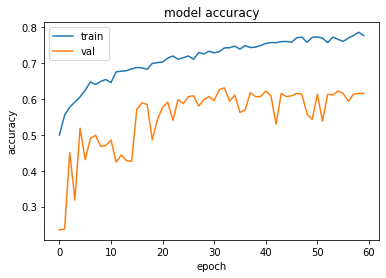

In [40]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
hist_compress = model.fit(new_train_generator, validation_data=new_val_generator,epochs=60,verbose=1)

Epoch 1/60
55/55 [==============================] - 11s 202ms/step - loss: 0.8362 - accuracy: 0.7149 - val_loss: 0.6580 - val_accuracy: 0.7834
Epoch 2/60
55/55 [==============================] - 11s 206ms/step - loss: 0.8338 - accuracy: 0.7091 - val_loss: 0.6840 - val_accuracy: 0.7742
Epoch 3/60
55/55 [==============================] - 11s 199ms/step - loss: 0.7878 - accuracy: 0.7234 - val_loss: 1.0721 - val_accuracy: 0.6705
Epoch 4/60
55/55 [==============================] - 11s 197ms/step - loss: 0.7774 - accuracy: 0.7257 - val_loss: 0.7319 - val_accuracy: 0.7604
Epoch 5/60
55/55 [==============================] - 11s 197ms/step - loss: 0.7854 - accuracy: 0.7240 - val_loss: 0.8555 - val_accuracy: 0.7166
Epoch 6/60
55/55 [==============================] - 10s 189ms/step - loss: 0.7681 - accuracy: 0.7371 - val_loss: 0.6869 - val_accuracy: 0.7719
Epoch 7/60
55/55 [==============================] - 10s 185ms/step - loss: 0.7572 - accuracy: 0.7303 - val_loss: 0.7048 - val_accuracy: 0.7765

Epoch 58/60
55/55 [==============================] - 13s 230ms/step - loss: 0.6260 - accuracy: 0.7840 - val_loss: 0.6731 - val_accuracy: 0.7788
Epoch 59/60
55/55 [==============================] - 12s 224ms/step - loss: 0.6156 - accuracy: 0.7863 - val_loss: 0.6563 - val_accuracy: 0.7811
Epoch 60/60
55/55 [==============================] - 12s 217ms/step - loss: 0.5977 - accuracy: 0.7920 - val_loss: 0.6925 - val_accuracy: 0.7696


In [42]:
new_test_generator = ImageDataGenerator(rescale = 1/255)

new_test_generator = new_test_generator.flow_from_directory(new_test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    shuffle=True,
                                                    class_mode = 'categorical',
                                                    )

Found 343 images belonging to 6 classes.


In [43]:
model.evaluate(new_train_generator)

55/55 [==============================] - 7s 123ms/step - loss: 0.4822 - accuracy: 0.8389


[0.48215314745903015, 0.838857114315033]

In [44]:
model.evaluate(new_val_generator)

14/14 [==============================] - 2s 118ms/step - loss: 0.6925 - accuracy: 0.7696


[0.692481279373169, 0.7695852518081665]

In [45]:
model.evaluate(test_generator)

72/72 [==============================] - 9s 129ms/step - loss: 0.5386 - accuracy: 0.8211


[0.538582444190979, 0.8210848569869995]

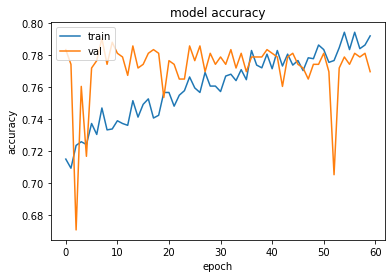

In [46]:
plt.plot(hist_compress.history['accuracy'])
plt.plot(hist_compress.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [47]:
model.save("compressed_boye.h5")